<a href="https://colab.research.google.com/github/aasthadawar02/TME_6015/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing required libraries**

In [1]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

[Iris Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

**Loading Dataset**

In [2]:
data, labels = load_iris(return_X_y=True)

**Data Analysis**

In [3]:
(n_samples, n_features), n_classes = data.shape, np.unique(labels).size

In [4]:
print(f"# classes: {n_classes}; # samples: {n_samples}; # features {n_features}")

# classes: 3; # samples: 150; # features 4


In [5]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Data Preprocessing**

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

**Implementation of KMeans Clustering**

In [8]:
print(82 * "_")
print("inertia \t silhouette \t davies_bouldin_score")
kmeans = KMeans(n_clusters=n_classes, init='k-means++', n_init = 4,random_state = 0)
kmeans.fit(X)
print("{:.3f} \t {:.3f} \t         {:.3f}".format(kmeans.inertia_,silhouette_score(X, kmeans.labels_),davies_bouldin_score(X, kmeans.labels_)))
print(82 * "_")


__________________________________________________________________________________
inertia 	 silhouette 	 davies_bouldin_score
139.820 	 0.460 	         0.834
__________________________________________________________________________________


**Visualize the results on PCA-reduced data**

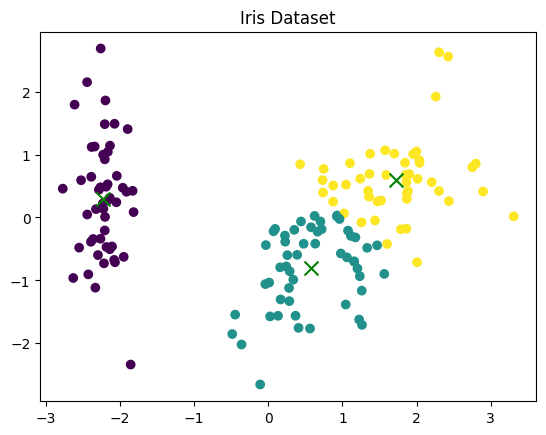

In [9]:
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(n_clusters=n_classes, init='k-means++', n_init = 4,random_state = 0)
kmeans.fit(reduced_data)
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',c="green",s=100)
plt.title('Iris Dataset')
plt.show()

**Experiment with these parameters and observe how they affect the clustering results**

In [10]:
print(82 * "_")
print("init  \t inertia \t silhouette \t davies_bouldin_score")
kmeans = KMeans(n_clusters=n_classes, init='k-means++', n_init = 4,random_state = 0)
kmeans.fit(X)
print("k-means\t{:.3f} \t {:.3f} \t         {:.3f}".format(kmeans.inertia_,silhouette_score(X, kmeans.labels_),davies_bouldin_score(X, kmeans.labels_)))
kmeans_random = KMeans(n_clusters=n_classes, init='random', n_init = 4,random_state = 0)
kmeans_random.fit(X)
print("random \t {:.3f} \t {:.3f} \t         {:.3f}".format(kmeans_random.inertia_,silhouette_score(X, kmeans_random.labels_),davies_bouldin_score(X, kmeans_random.labels_)))
print(82 * "_")


__________________________________________________________________________________
init  	 inertia 	 silhouette 	 davies_bouldin_score
k-means	139.820 	 0.460 	         0.834
random 	 139.820 	 0.460 	         0.834
__________________________________________________________________________________


In [11]:
print(82 * "_")
print("n_init\tinertia \t silhouette \t davies_bouldin_score")
for i in range(4,12,2):
  kmeans = KMeans(n_clusters=n_classes, init='k-means++', n_init = i,random_state = 0)
  kmeans.fit(X)
  print("{}\t{:.3f} \t {:.3f} \t         {:.3f}".format(i,kmeans.inertia_,silhouette_score(X, kmeans.labels_),davies_bouldin_score(X, kmeans.labels_)))
print(82 * "_")

__________________________________________________________________________________
n_init	inertia 	 silhouette 	 davies_bouldin_score
4	139.820 	 0.460 	         0.834
6	139.820 	 0.460 	         0.834
8	139.820 	 0.460 	         0.834
10	139.820 	 0.460 	         0.834
__________________________________________________________________________________


In [12]:
print(82 * "_")
print("max_iter\tinertia \t silhouette \t davies_bouldin_score")
for i in range(100,400,50):
  kmeans = KMeans(n_clusters=n_classes, init='k-means++', n_init = 4, max_iter= i,random_state = 0)
  kmeans.fit(X)
  print("{}\t\t{:.3f} \t {:.3f} \t         {:.3f}".format(i,kmeans.inertia_,silhouette_score(X, kmeans.labels_),davies_bouldin_score(X, kmeans.labels_)))
print(82 * "_")

__________________________________________________________________________________
max_iter	inertia 	 silhouette 	 davies_bouldin_score
100		139.820 	 0.460 	         0.834
150		139.820 	 0.460 	         0.834
200		139.820 	 0.460 	         0.834
250		139.820 	 0.460 	         0.834
300		139.820 	 0.460 	         0.834
350		139.820 	 0.460 	         0.834
__________________________________________________________________________________


**Implementation of Agglomerative Clustering**

In [13]:
print(82 * "_")
print("silhouette \t davies_bouldin_score")
agg_model = AgglomerativeClustering(n_clusters=n_classes, metric='euclidean', linkage='ward')
agg_model.fit(X)
print("{:.3f} \t         {:.3f}".format(silhouette_score(X, agg_model.labels_),davies_bouldin_score(X, agg_model.labels_)))
print(82 * "_")

__________________________________________________________________________________
silhouette 	 davies_bouldin_score
0.447 	         0.803
__________________________________________________________________________________


****Visualize the results on PCA-reduced data****

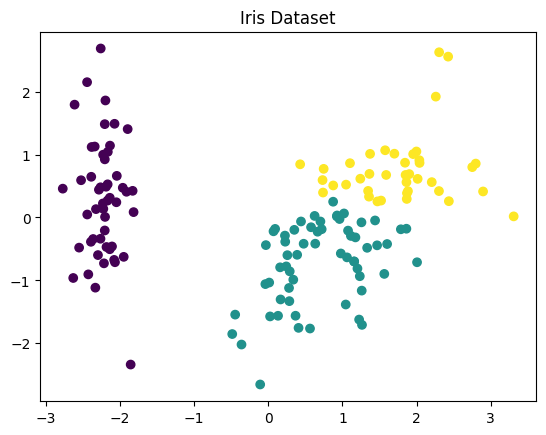

In [14]:
reduced_data = PCA(n_components=2).fit_transform(X)
agg_model = AgglomerativeClustering(n_clusters=n_classes, metric='euclidean', linkage='ward')
agg_model.fit(reduced_data)
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=agg_model.labels_)
plt.title('Iris Dataset')
plt.show()

**Experiment with these parameters and observe how they affect the clustering results.**

In [15]:
print(82 * "_")
print("metric\t\t\tlinkage\t\t\tsilhouette\t\tdavies_bouldin_score")
agg_model = AgglomerativeClustering(n_clusters=n_classes, metric='euclidean', linkage='ward')
agg_model.fit(X)
print("{}\t\t{}\t\t\t{:.3f}\t\t\t{:.3f}".format('euclidean', 'ward', silhouette_score(X, agg_model.labels_),davies_bouldin_score(X, agg_model.labels_)))
agg_model = AgglomerativeClustering(n_clusters=n_classes, metric='euclidean', linkage='average')
agg_model.fit(X)
print("{}\t\t{}\t\t\t{:.3f}\t\t\t{:.3f}".format('euclidean', 'average', silhouette_score(X, agg_model.labels_),davies_bouldin_score(X, agg_model.labels_)))
agg_model = AgglomerativeClustering(n_clusters=n_classes, metric='manhattan', linkage='average')
agg_model.fit(X)
print("{}\t\t{}\t\t\t{:.3f}\t\t\t{:.3f}".format('manhattan', 'average', silhouette_score(X, agg_model.labels_),davies_bouldin_score(X, agg_model.labels_)))
agg_model = AgglomerativeClustering(n_clusters=n_classes, metric='l1', linkage='average')
agg_model.fit(X)
print("{}\t\t\t{}\t\t\t{:.3f}\t\t\t{:.3f}".format('l1', 'average', silhouette_score(X, agg_model.labels_),davies_bouldin_score(X, agg_model.labels_)))
agg_model = AgglomerativeClustering(n_clusters=n_classes, metric='l2', linkage='average')
agg_model.fit(X)
print("{}\t\t\t{}\t\t\t{:.3f}\t\t\t{:.3f}".format('l2', 'average', silhouette_score(X, agg_model.labels_),davies_bouldin_score(X, agg_model.labels_)))
agg_model = AgglomerativeClustering(n_clusters=n_classes, metric='cosine', linkage='average')
agg_model.fit(X)
print("{}\t\t\t{}\t\t\t{:.3f}\t\t\t{:.3f}".format('cosine', 'average', silhouette_score(X, agg_model.labels_),davies_bouldin_score(X, agg_model.labels_)))
agg_model = AgglomerativeClustering(n_clusters=n_classes, metric='euclidean', linkage='complete')
agg_model.fit(X)
print("{}\t\t{}\t\t{:.3f}\t\t\t{:.3f}".format('euclidean', 'complete', silhouette_score(X, agg_model.labels_),davies_bouldin_score(X, agg_model.labels_)))
agg_model = AgglomerativeClustering(n_clusters=n_classes, metric='manhattan', linkage='complete')
agg_model.fit(X)
print("{}\t\t{}\t\t{:.3f}\t\t\t{:.3f}".format('manhattan', 'complete', silhouette_score(X, agg_model.labels_),davies_bouldin_score(X, agg_model.labels_)))
agg_model = AgglomerativeClustering(n_clusters=n_classes, metric='l1', linkage='complete')
agg_model.fit(X)
print("{}\t\t\t{}\t\t{:.3f}\t\t\t{:.3f}".format('l1', 'complete', silhouette_score(X, agg_model.labels_),davies_bouldin_score(X, agg_model.labels_)))
agg_model = AgglomerativeClustering(n_clusters=n_classes, metric='l2', linkage='complete')
agg_model.fit(X)
print("{}\t\t\t{}\t\t{:.3f}\t\t\t{:.3f}".format('l2', 'complete', silhouette_score(X, agg_model.labels_),davies_bouldin_score(X, agg_model.labels_)))
agg_model = AgglomerativeClustering(n_clusters=n_classes, metric='cosine', linkage='complete')
agg_model.fit(X)
print("{}\t\t\t{}\t\t{:.3f}\t\t\t{:.3f}".format('cosine', 'complete', silhouette_score(X, agg_model.labels_),davies_bouldin_score(X, agg_model.labels_)))
print(82 * "_")

__________________________________________________________________________________
metric			linkage			silhouette		davies_bouldin_score
euclidean		ward			0.447			0.803
euclidean		average			0.480			0.575
manhattan		average			0.453			0.846
l1			average			0.453			0.846
l2			average			0.480			0.575
cosine			average			0.430			0.807
euclidean		complete		0.450			0.758
manhattan		complete		0.435			0.788
l1			complete		0.435			0.788
l2			complete		0.450			0.758
cosine			complete		0.447			0.810
__________________________________________________________________________________


**Comparison and Analysis**

In [16]:
print(82 * "_")
print("algorithm\t\tsilhouette \tdavies_bouldin_score")
kmeans = KMeans(n_clusters=n_classes, init='k-means++', n_init = 4,random_state = 0)
kmeans.fit(X)
print("k-means\t\t\t{:.3f}\t\t{:.3f}".format(silhouette_score(X, kmeans.labels_),davies_bouldin_score(X, kmeans.labels_)))
agg_model = AgglomerativeClustering(n_clusters=n_classes, metric='euclidean', linkage='ward')
agg_model.fit(X)
print("agglomerative\t\t{:.3f}\t\t{:.3f}".format(silhouette_score(X, agg_model.labels_),davies_bouldin_score(X, agg_model.labels_)))
print(82 * "_")

__________________________________________________________________________________
algorithm		silhouette 	davies_bouldin_score
k-means			0.460		0.834
agglomerative		0.447		0.803
__________________________________________________________________________________


**Here we observe that KMeans has better silhouette index than agglomerative **

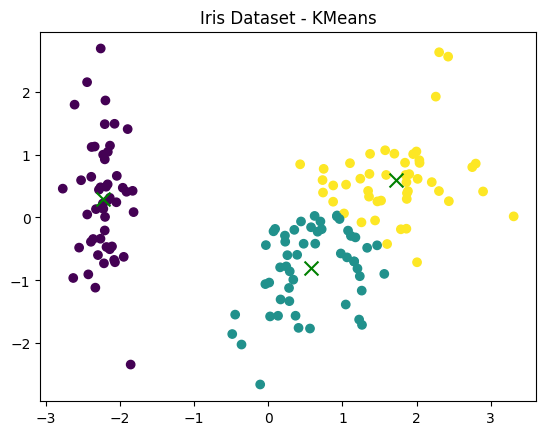

In [17]:
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(n_clusters=n_classes, init='k-means++', n_init = 4,random_state = 0)
kmeans.fit(reduced_data)
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',c="green",s=100)
plt.title('Iris Dataset - KMeans')
plt.show()

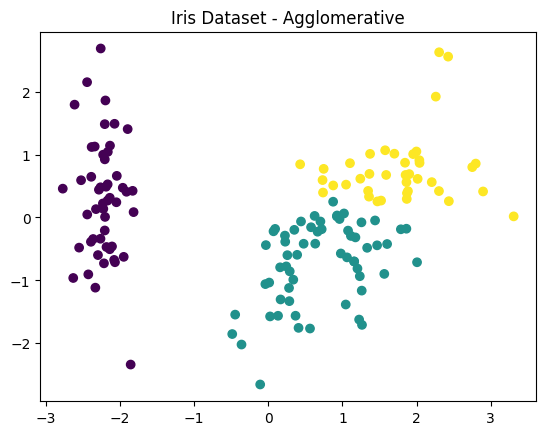

In [18]:
reduced_data = PCA(n_components=2).fit_transform(X)
agg_model = AgglomerativeClustering(n_clusters=n_classes, metric='euclidean', linkage='ward')
agg_model.fit(reduced_data)
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=agg_model.labels_)
plt.title('Iris Dataset - Agglomerative')
plt.show()